In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

deliveries_matches = deliveries.merge(matches, how='left', on='id')
srh = deliveries_matches[(deliveries_matches['team1'] == 'Sunrisers Hyderabad') | (deliveries_matches['team2'] == 'Sunrisers Hyderabad')]
srh


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
76839,598000,1,0,1,PA Reddy,PA Patel,MN Samuels,1,0,1,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76840,598000,1,0,2,PA Patel,PA Reddy,MN Samuels,1,0,1,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76841,598000,1,0,3,PA Reddy,PA Patel,MN Samuels,0,1,1,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76842,598000,1,1,2,PA Patel,PA Reddy,B Kumar,0,0,0,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76843,598000,1,1,3,PA Patel,PA Reddy,B Kumar,0,0,0,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193228,1237180,2,18,7,S Nadeem,Sandeep Sharma,K Rabada,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193229,1237180,2,19,5,Sandeep Sharma,S Nadeem,A Nortje,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193230,1237180,2,19,2,S Nadeem,Sandeep Sharma,A Nortje,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193231,1237180,2,19,3,Sandeep Sharma,S Nadeem,A Nortje,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
ids_of_matches_with_rashid = srh[srh['bowler'].str.startswith('Rashid')]['id'].unique()

In [11]:
ids_of_matches_without_rashid = set(srh.id.unique()) - set(ids_of_matches_with_rashid)

In [16]:
ids_of_matches_without_rashid = list(ids_of_matches_without_rashid)


In [18]:
srh_without_rashid = srh[srh['id'].isin(ids_of_matches_without_rashid)]

In [19]:
srh_without_rashid

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
76839,598000,1,0,1,PA Reddy,PA Patel,MN Samuels,1,0,1,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76840,598000,1,0,2,PA Patel,PA Reddy,MN Samuels,1,0,1,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76841,598000,1,0,3,PA Reddy,PA Patel,MN Samuels,0,1,1,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76842,598000,1,1,2,PA Patel,PA Reddy,B Kumar,0,0,0,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
76843,598000,1,1,3,PA Patel,PA Reddy,B Kumar,0,0,0,...,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,runs,22.0,N,NaN,S Ravi,SJA Taufel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136525,981019,2,6,4,V Kohli,CH Gayle,MC Henriques,0,0,0,...,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,N,NaN,HDPK Dharmasena,BNJ Oxenford
136526,981019,2,12,2,V Kohli,AB de Villiers,BB Sran,6,0,6,...,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,N,NaN,HDPK Dharmasena,BNJ Oxenford
136527,981019,2,12,3,V Kohli,AB de Villiers,BB Sran,2,0,2,...,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,N,NaN,HDPK Dharmasena,BNJ Oxenford
136528,981019,2,11,6,AB de Villiers,V Kohli,Bipul Sharma,1,0,1,...,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,N,NaN,HDPK Dharmasena,BNJ Oxenford


In [20]:
srh_with_rashid = srh[srh['id'].isin(ids_of_matches_with_rashid)]

In [21]:
srh_with_rashid

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
136530,1082591,1,7,2,MC Henriques,S Dhawan,TM Head,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136531,1082591,1,7,3,S Dhawan,MC Henriques,TM Head,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136532,1082591,1,7,4,MC Henriques,S Dhawan,TM Head,6,0,6,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136533,1082591,1,7,5,MC Henriques,S Dhawan,TM Head,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136534,1082591,1,7,6,S Dhawan,MC Henriques,TM Head,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193228,1237180,2,18,7,S Nadeem,Sandeep Sharma,K Rabada,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193229,1237180,2,19,5,Sandeep Sharma,S Nadeem,A Nortje,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193230,1237180,2,19,2,S Nadeem,Sandeep Sharma,A Nortje,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193231,1237180,2,19,3,Sandeep Sharma,S Nadeem,A Nortje,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [24]:
srh_with_rashid[srh_with_rashid['id'] == ids_of_matches_with_rashid[0]].iloc[0]['winner']

'Sunrisers Hyderabad'

In [35]:
with_or_without_rashid_stats = pd.DataFrame(columns=['Filter', 'Wins', 'Losses'])

## Wins & Losses with Rashid

In [30]:
wins = 0
losses = 0
for i in range(len(ids_of_matches_with_rashid)):
    if (srh_with_rashid[srh_with_rashid['id'] == ids_of_matches_with_rashid[i]].iloc[0]['winner'] == 'Sunrisers Hyderabad'):
        wins += 1
    else :
        losses += 1
wins, losses

(32, 30)

In [36]:
with_or_without_rashid_stats = with_or_without_rashid_stats.append({'Filter': 'With Rashid', 'Wins': 32, 'Losses': 30}, ignore_index=True)
with_or_without_rashid_stats

,Filter,Wins,Losses
0,With Rashid,32,30


## Wins & Losses without Rashid

In [37]:
wins = 0
losses = 0
for i in range(len(ids_of_matches_without_rashid)):
    if (srh_without_rashid[srh_without_rashid['id'] == ids_of_matches_without_rashid[i]].iloc[0]['winner'] == 'Sunrisers Hyderabad'):
        wins += 1
    else :
        losses += 1
wins, losses

(34, 28)

In [38]:
with_or_without_rashid_stats = with_or_without_rashid_stats.append({'Filter': 'Without Rashid', 'Wins': 34, 'Losses': 28}, ignore_index=True)
with_or_without_rashid_stats

,Filter,Wins,Losses
0,With Rashid,32,30
1,Without Rashid,34,28


## Dissecting Rashid's numbers in SRH's wins & losses when he plays

In [43]:
ids_of_wins_for_srh_with_rashid = srh_with_rashid[srh_with_rashid['winner'] == 'Sunrisers Hyderabad']['id'].unique()
ids_of_losses_for_srh_with_rashid = srh_with_rashid[srh_with_rashid['winner'] != 'Sunrisers Hyderabad']['id'].unique()

In [46]:
wins_for_srh_with_rashid = srh_with_rashid[srh_with_rashid['id'].isin(ids_of_wins_for_srh_with_rashid)]
losses_for_srh_with_rashid = srh_with_rashid[srh_with_rashid['id'].isin(ids_of_losses_for_srh_with_rashid)]

In [48]:
losses_for_srh_with_rashid

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
138646,1082600,1,1,3,S Dhawan,DA Warner,SL Malinga,0,0,0,...,Sunrisers Hyderabad,Mumbai Indians,field,Mumbai Indians,wickets,4.0,N,NaN,Nitin Menon,CK Nandan
138647,1082600,1,1,4,S Dhawan,DA Warner,SL Malinga,1,0,1,...,Sunrisers Hyderabad,Mumbai Indians,field,Mumbai Indians,wickets,4.0,N,NaN,Nitin Menon,CK Nandan
138648,1082600,1,1,5,DA Warner,S Dhawan,SL Malinga,0,0,0,...,Sunrisers Hyderabad,Mumbai Indians,field,Mumbai Indians,wickets,4.0,N,NaN,Nitin Menon,CK Nandan
138649,1082600,1,1,6,DA Warner,S Dhawan,SL Malinga,0,1,1,...,Sunrisers Hyderabad,Mumbai Indians,field,Mumbai Indians,wickets,4.0,N,NaN,Nitin Menon,CK Nandan
138650,1082600,1,2,1,DA Warner,S Dhawan,Harbhajan Singh,4,0,4,...,Sunrisers Hyderabad,Mumbai Indians,field,Mumbai Indians,wickets,4.0,N,NaN,Nitin Menon,CK Nandan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193228,1237180,2,18,7,S Nadeem,Sandeep Sharma,K Rabada,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193229,1237180,2,19,5,Sandeep Sharma,S Nadeem,A Nortje,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193230,1237180,2,19,2,S Nadeem,Sandeep Sharma,A Nortje,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193231,1237180,2,19,3,Sandeep Sharma,S Nadeem,A Nortje,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [50]:
rashid_when_srh_wins = wins_for_srh_with_rashid[wins_for_srh_with_rashid['bowler'] == 'Rashid Khan']
rashid_when_srh_loses = losses_for_srh_with_rashid[losses_for_srh_with_rashid['bowler'] == 'Rashid Khan']


In [52]:
rashid_when_srh_wins.ball = 1
rashid_when_srh_loses.ball = 1

In [63]:
rashid_when_srh_wins.sum()

id                                                         892191093
inning                                                          1163
over                                                            8449
ball                                                             775
batsman            TM HeadTM HeadTM HeadKM JadhavTM HeadKM Jadhav...
non_striker        KM JadhavKM JadhavKM JadhavTM HeadKM JadhavTM ...
bowler             Rashid KhanRashid KhanRashid KhanRashid KhanRa...
batsman_runs                                                     734
extra_runs                                                        30
total_runs                                                       764
non_boundary                                                       0
is_wicket                                                         50
batting_team       Royal Challengers BangaloreRoyal Challengers B...
bowling_team       Sunrisers HyderabadSunrisers HyderabadSunriser...
city               HyderabadHydera

In [59]:
rashid_stats = pd.DataFrame(columns=['Filter', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy Rate', 'Strike Rate'])

In [64]:
rashid_stats = rashid_stats.append({'Filter': 'In Wins', 'Balls': 775, 'Runs': 764, 'Wickets': 48, 'Average': 15.91, 'Economy Rate': 5.91, 'Strike Rate': 16.14}, ignore_index=True)
rashid_stats

,Filter,Balls,Runs,Wickets,Average,Economy Rate,Strike Rate
0,In Losses,715,809,29,27.89,6.78,24.65
1,In Wins,775,764,48,15.91,5.91,16.14


In [66]:
rashid_when_srh_wins.groupby(by='id').sum()

,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin
id,,,,,,,,,,
1082591,48,228,24,36,0,36,0,2,0,840.0
1082596,24,174,24,19,0,19,0,3,0,216.0
1082609,50,245,25,41,4,45,0,2,0,125.0
1082611,48,228,24,33,2,35,0,0,0,360.0
1082623,48,240,24,16,2,18,0,1,0,624.0
1082627,50,267,25,35,3,38,0,1,0,1200.0
1082638,24,288,24,22,0,22,0,1,0,168.0
1082643,24,276,24,34,0,34,0,3,0,192.0
1136564,24,300,24,23,1,24,0,1,0,216.0


Wicketless in Losses = 8
Total Losses = 30

Wicketless in Wins = 4
Total Wins = 32

Total wicketless = 12
Total Matches = 62

SRH lose 67% of matches in which Rashid Khan goes wicketless

In [67]:
rashid_stats['% of Wicketless Matches'] = [26.67, 12.5]
rashid_stats

,Filter,Balls,Runs,Wickets,Average,Economy Rate,Strike Rate,% of Wicketless Matches
0,In Losses,715,809,29,27.89,6.78,24.65,26.67
1,In Wins,775,764,48,15.91,5.91,16.14,12.50


In [89]:
with_or_without_rashid_stats['Win %'] = [51.61, 54.83]

Text(0.5, 1.0, 'SRH Win % with & without Rashid')

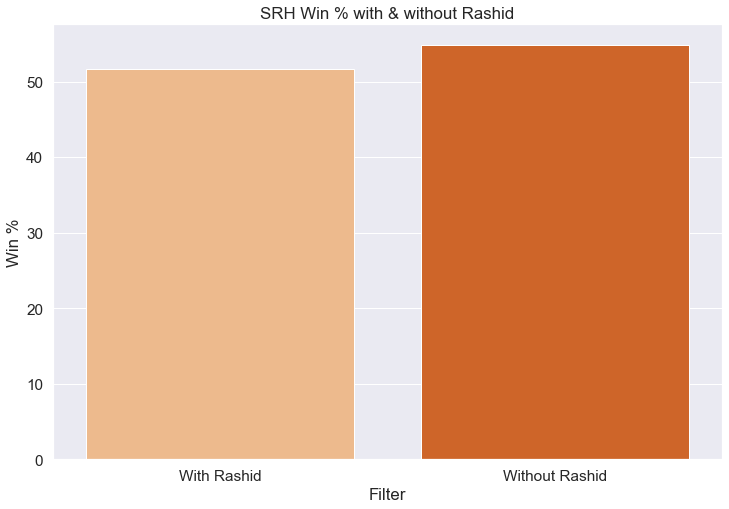

In [110]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
sns.barplot(x='Filter',y='Win %', data=with_or_without_rashid_stats, palette='Oranges' )
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
plt.title("SRH Win % with & without Rashid")
# plt.xticks(rotation=75);

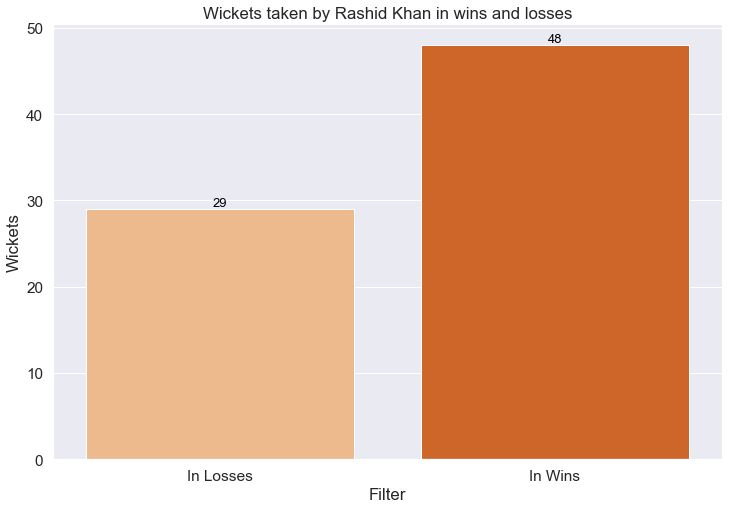

In [124]:
# # fig, ax = plt.figure(figsize=(14,8))
# # sns.set(font_scale=1.4)
# # sns.set_style('darkgrid')
# # sns.barplot(x='Filter',y='Win %', data=with_or_without_rashid_stats, palette='Oranges' )
# # plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
# # plt.title("SRH Win % with & without Rashid")
# # plt.xticks(rotation=75);
# ax = plt.subplot(111)
# ax.bar(rashid_stats['Filter'], rashid_stats['Average'], width=0.2, color='b', align='center')
# ax.bar(rashid_stats['Filter'], rashid_stats['Strike Rate'], width=0.2, color='g', align='center')
# ax.bar(rashid_stats['Filter'], rashid_stats['Economy Rate'], width=0.2, color='r', align='center')
# # ax.xaxis_date()


plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Filter',y='Wickets', data=rashid_stats, palette='Oranges' )
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
plt.title("Wickets taken by Rashid Khan in wins and losses")
# plt.xticks(rotation=75);

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

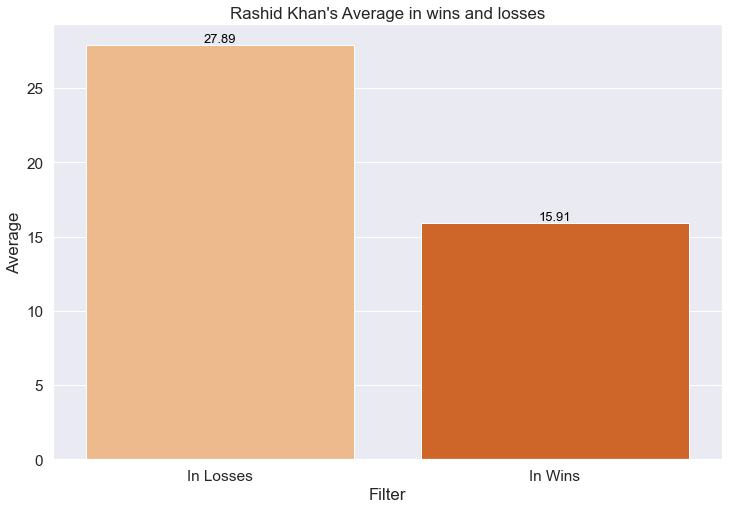

In [123]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Filter',y='Average', data=rashid_stats, palette='Oranges' )
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
plt.title("Rashid Khan's Average in wins and losses")
# plt.xticks(rotation=75);
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

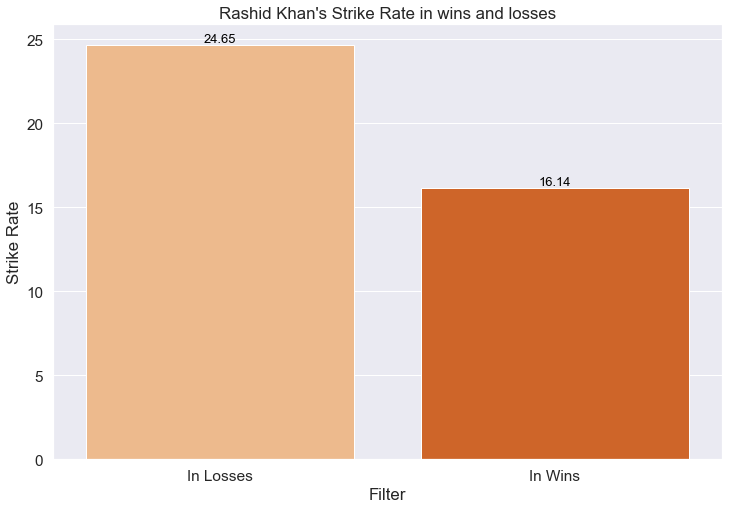

In [122]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Filter',y='Strike Rate', data=rashid_stats, palette='Oranges' )
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
plt.title("Rashid Khan's Strike Rate in wins and losses")
# plt.xticks(rotation=75);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

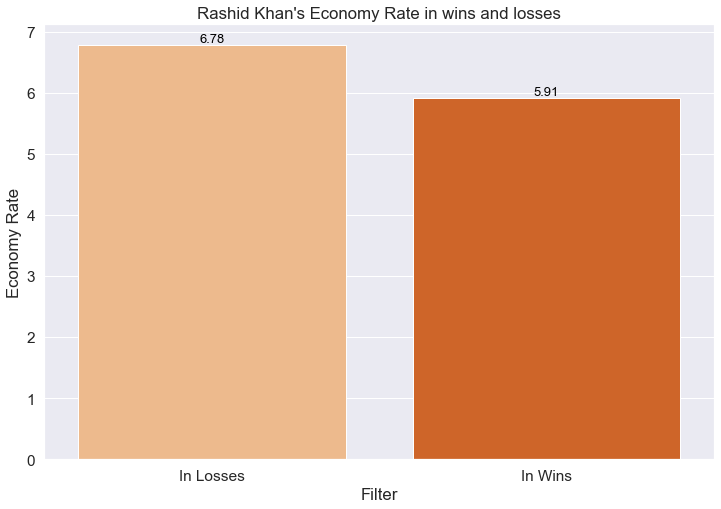

In [120]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Filter',y='Economy Rate', data=rashid_stats, palette='Oranges' )
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
plt.title("Rashid Khan's Economy Rate in wins and losses")
# plt.xticks(rotation=75);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

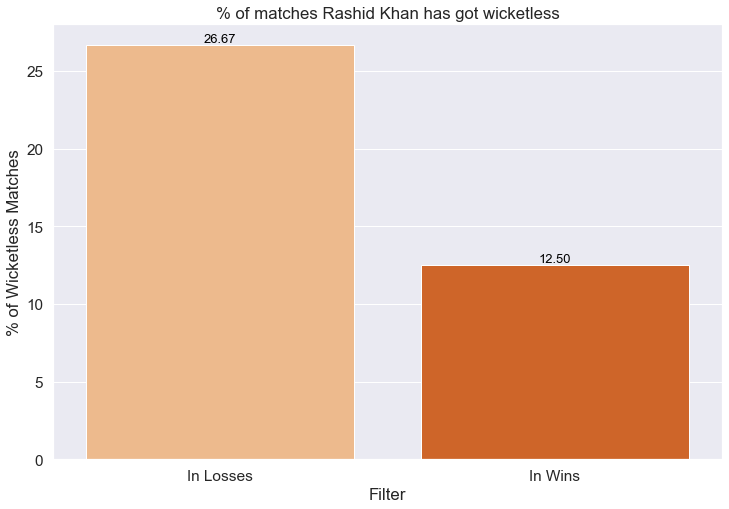

In [121]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Filter',y='% of Wicketless Matches', data=rashid_stats, palette='Oranges' )
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Losses', shadow=True)
plt.title("% of matches Rashid Khan has got wicketless")
# plt.xticks(rotation=75);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)